In [2]:
# Importing all necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 

from mlxtend.frequent_patterns import fpgrowth, association_rules

In [3]:
# Importing DataSet

# df = pd.read_csv('../0.Datasets/processed/processed_car_data.csv')
df = pd.read_csv('../0.Datasets/processed/processed_car_data.csv').iloc[:100,]
# df = pd.read_csv('../0.Datasets/processed/sliced_car_data.csv')
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,sale_day,sale_date
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue,2014-12-16 12:30:00
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue,2014-12-16 12:30:00
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu,2015-01-15 04:30:00
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu,2015-01-29 04:30:00
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu,2014-12-18 12:30:00


In [18]:
# selecting columns from df

x = df[['odometer','condition','mmr']]
x.head()

,odometer,condition,mmr
0,16639.0,5.0,20500.0
1,9393.0,5.0,20800.0
2,1331.0,45.0,31900.0
3,14282.0,41.0,27500.0
4,2641.0,43.0,66000.0


In [5]:
# Converting condition column to int bacause it is in float 
# then converting to str 

x.loc[:,'condition'] = x['condition'].astype(int)
x.loc[:,'condition'] = x['condition'].astype(str)

C:\Users\AjayPatil\AppData\Local\Temp\ipykernel_13860\1848028858.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['5.0' '5.0' '45.0' '41.0' '43.0' '1.0' '34.0' '2.0' '42.0' '3.0' '48.0'
 '48.0' '2.0' '5.0' '30.0' '2.0' '30.0' '49.0' '17.0' '34.0' '19.0' '29.0'
 '30.0' '49.0' '38.0' '30.0' '42.0' '48.0' '30.0' '42.0' '42.0' '42.0'
 '5.0' '38.0' '44.0' '2.0' '45.0' '5.0' '38.0' '45.0' '47.0' '30.0' '32.0'
 '41.0' '30.0' '4.0' '42.0' '34.0' '25.0' '5.0' '37.0' '30.0' '42.0' '1.0'
 '42.0' '48.0' '1.0' '43.0' '5.0' '47.0' '44.0' '2.0' '39.0' '31.0' '1.0'
 '5.0' '41.0' '5.0' '4.0' '2.0' '43.0' '48.0' '43.0' '1.0' '4.0' '4.0'
 '3.0' '29.0' '44.0' '5.0' '1.0' '38.0' '41.0' '28.0' '2.0' '37.0' '46.0'
 '41.0' '42.0' '36.0' '5.0' '30.0' '35.0' '49.0' '1.0' '37.0' '2.0' '37.0'
 '37.0' '49.0']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  x.loc[:,'condition'] = x['condition'].as

In [19]:
# converting odometer, mmr,  to the float
x.loc[:,'odometer'] = x['odometer'].astype(float)
x.loc[:,'mmr'] = x['mmr'].astype(float)

In [20]:
# using pd.cut to cut down the data into 3  bins and giving the label to them

x.loc[:,'odometer'] = pd.cut(x['odometer'], bins= 3, labels=['low','medium','high'])
x.loc[:,'mmr'] = pd.cut(x['mmr'], bins= 3, labels=['low','medium','high'])

C:\Users\AjayPatil\AppData\Local\Temp\ipykernel_13860\722713606.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['medium', 'low', 'low', 'medium', 'low', ..., 'low', 'low', 'low', 'high', 'low']
Length: 100
Categories (3, object): ['low' < 'medium' < 'high']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  x.loc[:,'odometer'] = pd.cut(x['odometer'], bins= 3, labels=['low','medium','high'])
C:\Users\AjayPatil\AppData\Local\Temp\ipykernel_13860\722713606.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['low', 'low', 'medium', 'low', 'high', ..., 'high', 'low', 'low', 'low', 'low']
Length: 100
Categories (3, object): ['low' < 'medium' < 'high']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  x.loc[:,'mmr'] = pd.cut(x['mmr'], bins= 3, labels=['low','mediu

In [8]:
x.head()

,odometer,condition,mmr
0,medium,5.0,low
1,low,5.0,low
2,low,45.0,medium
3,medium,41.0,low
4,low,43.0,high


In [9]:
# converting  the categorial data into  the  dummy varible in this case (true, false)
one_hot = pd.get_dummies(x)

In [10]:
one_hot.head()

,odometer_low,odometer_medium,odometer_high,condition_1.0,condition_17.0,condition_19.0,condition_2.0,condition_25.0,condition_28.0,condition_29.0,...,condition_44.0,condition_45.0,condition_46.0,condition_47.0,condition_48.0,condition_49.0,condition_5.0,mmr_low,mmr_medium,mmr_high
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
3,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [11]:
# appling fpgrowth to the data with minimun support of 0.1
frequent_itemsets = fpgrowth(one_hot, min_support=0.1, use_colnames=True)

In [12]:
frequent_itemsets

,support,itemsets
0,0.59,(mmr_low)
1,0.24,(odometer_medium)
2,0.11,(condition_5.0)
3,0.66,(odometer_low)
4,0.23,(mmr_medium)
5,0.18,(mmr_high)
6,0.10,(odometer_high)
7,0.36,"(odometer_low, mmr_low)"
8,0.15,"(mmr_low, odometer_medium)"
9,0.10,"(mmr_low, condition_5.0)"


In [13]:
# Genereating association rules on the frequentitemsets with metric of confidence with value 0.5
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.5)

In [14]:
print(type(rules))
rules.head()


<class 'pandas.core.frame.DataFrame'>


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(odometer_low),(mmr_low),0.66,0.59,0.36,0.545455,0.924499,-0.0294,0.902000,-0.193676
1,(mmr_low),(odometer_low),0.59,0.66,0.36,0.610169,0.924499,-0.0294,0.872174,-0.166102
2,(odometer_medium),(mmr_low),0.24,0.59,0.15,0.625000,1.059322,0.0084,1.093333,0.073684
3,(condition_5.0),(mmr_low),0.11,0.59,0.10,0.909091,1.540832,0.0351,4.510000,0.394382
4,(mmr_medium),(odometer_low),0.23,0.66,0.17,0.739130,1.119895,0.0182,1.303333,0.139037


In [15]:
rules.sort_values(by='confidence',ascending=False, inplace=True)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
3,(condition_5.0),(mmr_low),0.11,0.59,0.10,0.909091,1.540832,0.0351,4.510000,0.394382
4,(mmr_medium),(odometer_low),0.23,0.66,0.17,0.739130,1.119895,0.0182,1.303333,0.139037
5,(mmr_high),(odometer_low),0.18,0.66,0.13,0.722222,1.094276,0.0112,1.224000,0.105066
2,(odometer_medium),(mmr_low),0.24,0.59,0.15,0.625000,1.059322,0.0084,1.093333,0.073684
1,(mmr_low),(odometer_low),0.59,0.66,0.36,0.610169,0.924499,-0.0294,0.872174,-0.166102


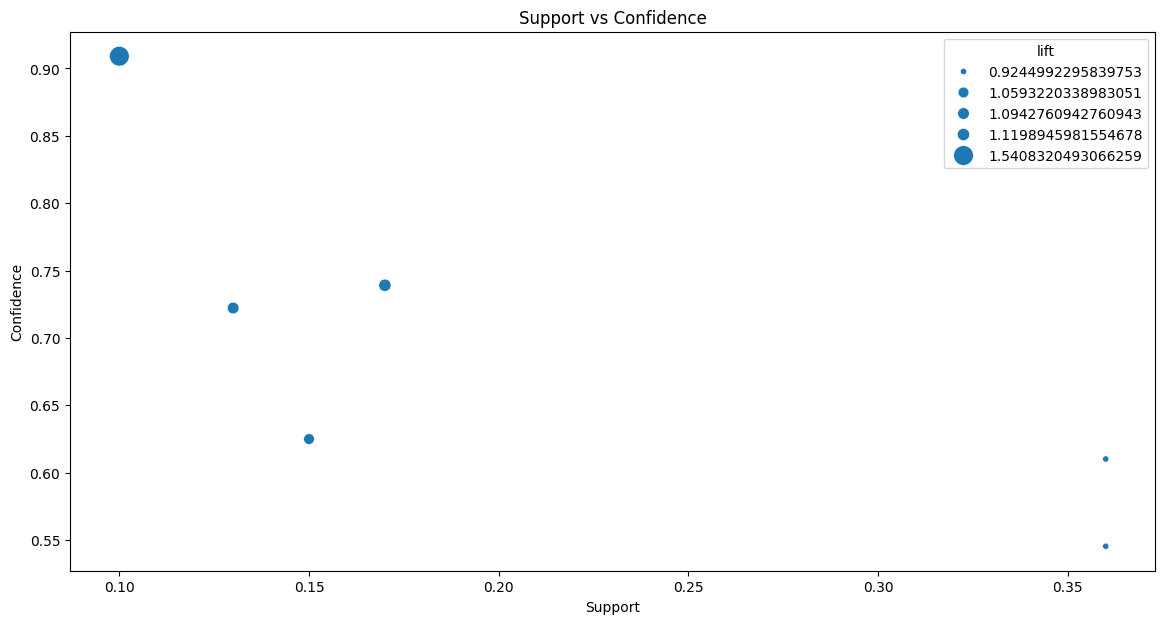

In [21]:
# plotting graph of support VS Confidence
plt.figure(figsize=(14,7))
sns.scatterplot(data= rules, x='support', y='confidence', size ='lift',sizes=(20, 200), legend=False)

plt.title('Support vs Confidence')
plt.xlabel('Support')
plt.ylabel('Confidence')

plt.savefig('./Graph/1.Support vs Confidence.png')
plt.show()

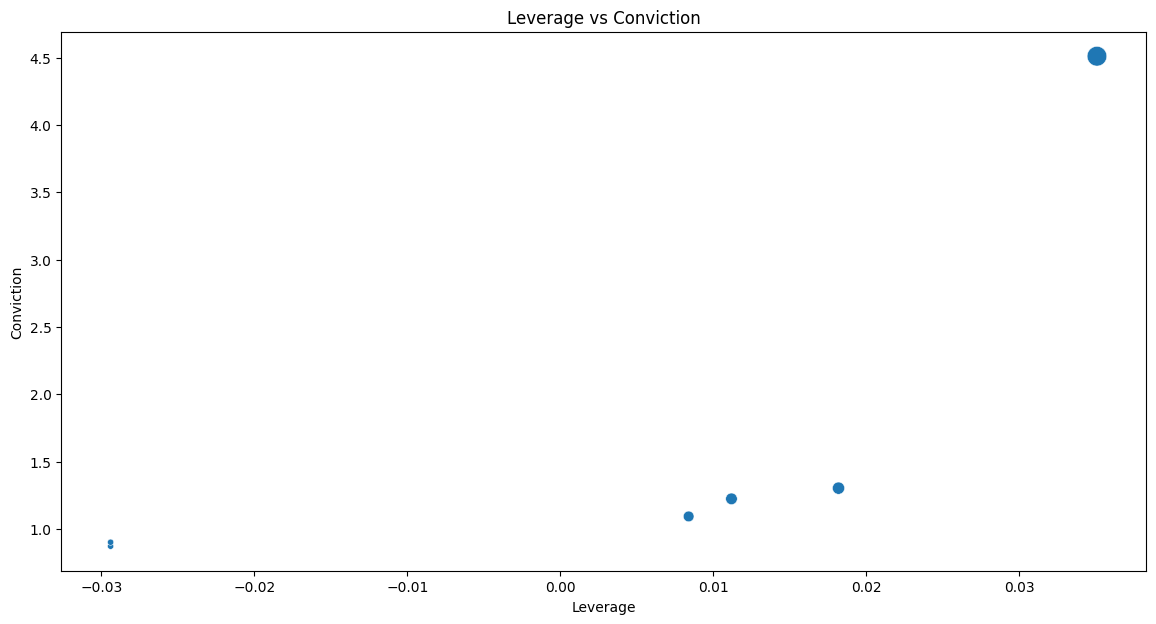

In [17]:
# plotting graph of Leverage vs Conviction
plt.figure(figsize=(14,7))
sns.scatterplot(x='leverage', y='conviction', size='lift', data=rules, legend=False, sizes=(20, 200))

plt.title('Leverage vs Conviction')
plt.xlabel('Leverage')
plt.ylabel('Conviction')

plt.savefig('./Graph/1.Leverage vs Conviction.png')
plt.show()